In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("../datasets/processed/preprocessed_data.csv")


In [6]:
k_model = KMeans(
    n_clusters=8,
     init='k-means++', 
     n_init='auto', 
     max_iter=300,
     tol=0.0001,
      verbose=0, 
      random_state=None,
      copy_x=True, 
      algorithm='lloyd'
)
clusters = k_model.fit_predict(df)

In [7]:
df["cluster_label"] = clusters
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,cluster_label
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152,4
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152,4
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405,1
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405,1
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405,1


In [8]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
plot_df = pd.DataFrame(pca_data, columns=['PC1','PC2'])
plot_df['Cluster'] = clusters
plot_df.head()

,PC1,PC2,Cluster
0,-0.267663,0.655350,4
1,-0.200803,0.338540,4
2,-2.070734,-2.127088,1
3,-1.960863,-2.673876,1
4,-1.936674,-2.099815,1


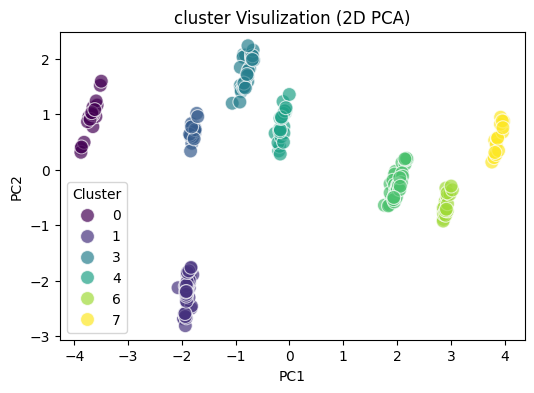

In [9]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'PC1', y = 'PC2',
               hue = 'Cluster',
               palette = 'viridis',
               data = plot_df,
               s=100,alpha=0.7)
plt.title("cluster Visulization (2D PCA)")
plt.show()

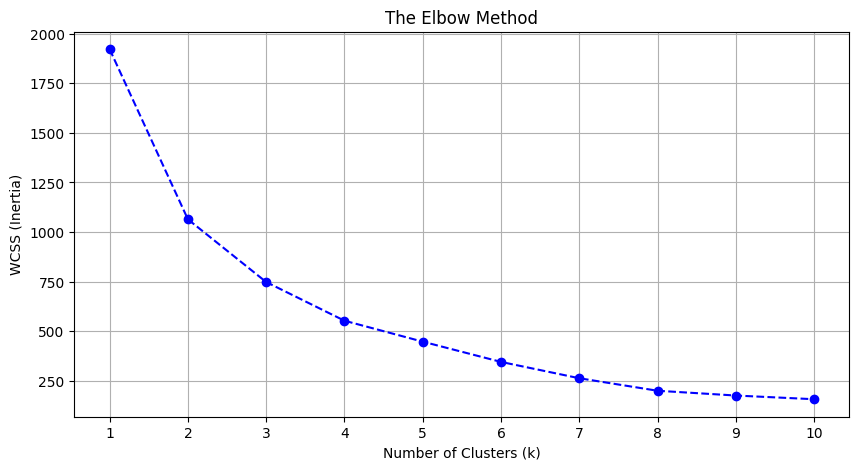

In [10]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [11]:
cluster_profiles  = df.groupby('cluster_label').mean(numeric_only=True)
print(cluster_profiles)

                    Age  Annual Income (k$)  Spending Score (1-100)  \
cluster_label                                                         
0             -0.027007            0.967012               -1.397168   
1             -0.926081           -0.700172                0.281824   
2             -0.399900            1.013441                1.260407   
3              1.330759           -0.484861               -0.427869   
4             -1.022051           -0.758211                0.437840   
5              0.841748           -0.490457               -0.367375   
6             -0.452456            0.943271                1.179823   
7              0.412658            1.212770               -1.110297   

               Genre_Female  Genre_Male  
cluster_label                            
0                 -1.128152    1.128152  
1                  0.886405   -0.886405  
2                 -1.128152    1.128152  
3                 -1.128152    1.128152  
4                 -1.128152    1.1281

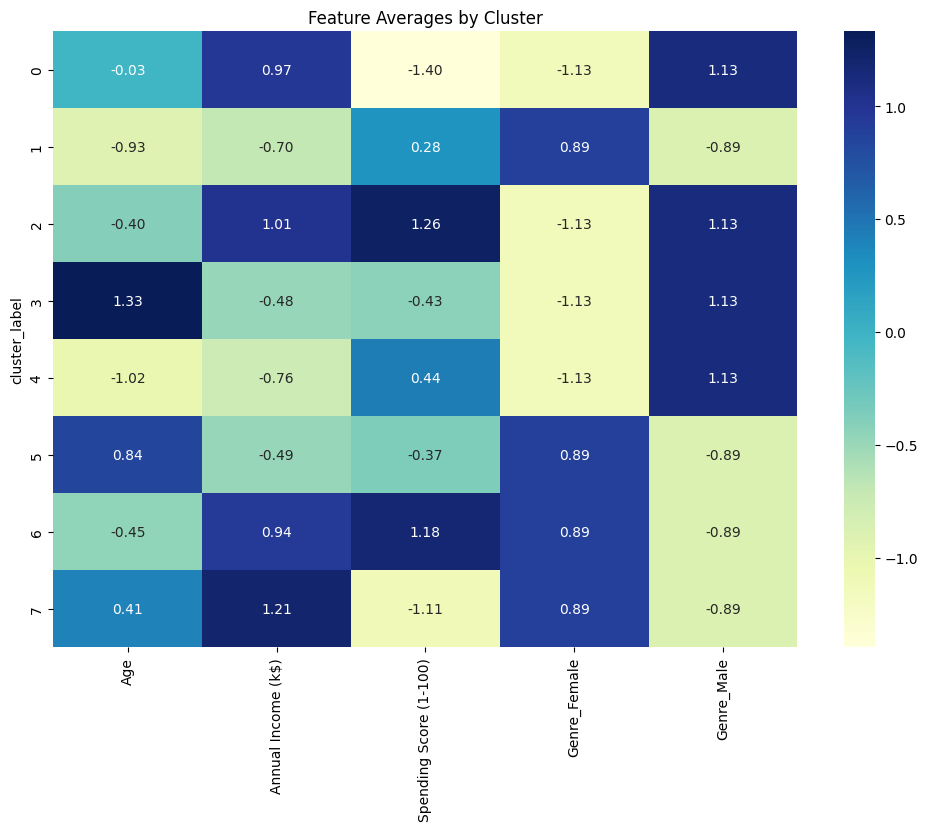

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profiles, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Feature Averages by Cluster')
plt.show()

In [13]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,cluster_label
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152,4
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152,4
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405,1
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405,1
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405,1


In [14]:
orginal_data = pd.read_csv("../datasets/raw/Mall_Customers.csv")
orginal_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
orginal_data["label"] = df["cluster_label"]

In [16]:
orginal_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [17]:
orginal_data.to_csv("data_with_labels(k-means).csv",index=False)

In [18]:
orginal_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


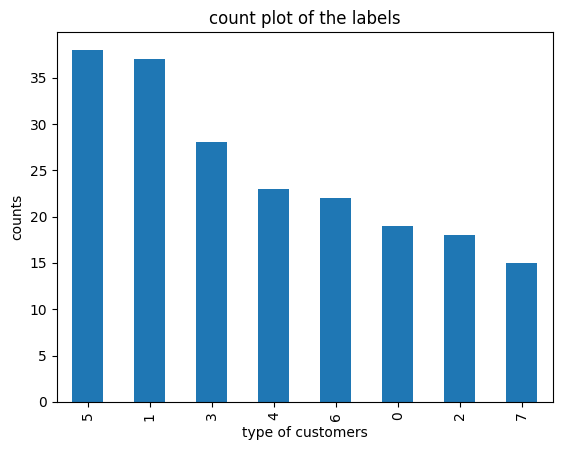

In [19]:
orginal_data["label"].value_counts().plot(kind='bar')
plt.title("count plot of the labels")
plt.xlabel("type of customers")
plt.ylabel("counts")
plt.show()